# SyriaTel Customer Churn Prediction

This project builds a classification model to predict customer churn using telecom data.

## Business Understanding

Churn is a significant cost driver in the telecom industry. SyriaTel wants to identify customers who are likely to stop using their services so they can intervene early and improve retention. The goal is to build a classification model that predicts customer churn.

## Data Understanding

- 3,333 customer records with 21 columns
- Target: `churn` (binary)
- Features include account length, call usage, service plans, and support history

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df['churn'] = df['churn'].astype(int)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## Churn Distribution

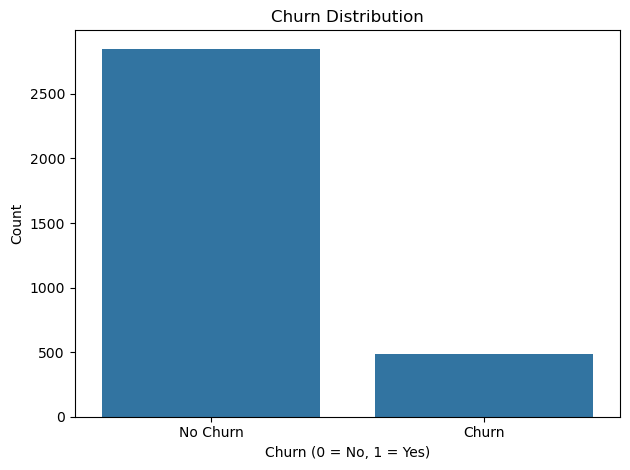

In [4]:
sns.countplot(data=df, x='churn')
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.tight_layout()
plt.show()

## Correlation with Churn

In [5]:
df.corr(numeric_only=True)['churn'].sort_values(ascending=False).head(10)

churn                     1.000000
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
Name: churn, dtype: float64

## Data Preparation

We drop the `phone number` column, encode binary columns, label encode `state`, and perform a stratified train-test split.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Copy and preprocess
df_prep = df.copy()
df_prep.drop(columns=['phone number'], inplace=True)

# Encode binary columns
binary_cols = ['international plan', 'voice mail plan']
for col in binary_cols:
    df_prep[col] = df_prep[col].map({'no': 0, 'yes': 1})

# Encode 'state'
le = LabelEncoder()
df_prep['state'] = le.fit_transform(df_prep['state'])

# Split data
X = df_prep.drop(columns='churn')
y = df_prep['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Baseline Model: Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

y_pred_lr = logreg.predict(X_test)
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       570
           1       0.47      0.20      0.28        97

    accuracy                           0.85       667
   macro avg       0.68      0.58      0.60       667
weighted avg       0.82      0.85      0.82       667

[[549  21]
 [ 78  19]]


c:\Users\Anthonymuthee\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
